In [60]:
import numpy as np
import matplotlib.pyplot as plt

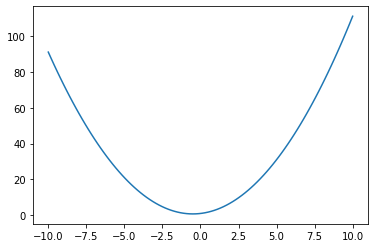

In [61]:
# 1.a
# we chose a=1 ,b=1, c=1
a=1
b=1
c=1

def function(x):
  return a+b*x+c*(x**2) 

x = np.linspace(-10, 10, 100)
y = function(x)
plt.plot(x, y)
plt.show()






In [62]:
# 1.b
def grad_f(x):
  return b+2*c*x



  

1.c







In [63]:



# 1.d
def grad_update(grad_f, x,eta):
  return x- eta*grad_f(x)

In [64]:
# 1.e
# we chose x0=10, epsilon=0.001, eta=0.1
def gradient_decent(x0,eta ,epsilon,grad_update):
  xt=x0
  x_next=grad_update(grad_f, xt,eta)
  while np.abs(xt-x_next)>epsilon: 
    xt=x_next
    x_next=grad_update(grad_f, xt,eta)
  return xt
print(gradient_decent(10,0.1,0.000001,grad_update))    

-0.4999957817876338


<div dir="rtl">
ערך זה שונה במעט מערך הX של נקודת המינימום שמצאנו בסעיף ג'. שינוי זה נובע מכך שהתקדמנו בצעדי  אטה 0.1  כפול הגרדיאנט של הנקדוה הקודמת . ולכן וייתכן ופספסנו או לא הגענו בדיוק לנקודת המינימום משום שעצרנו כאשר ההפרש בין שני ערכי X בשתי איטרציות היה קטן מהאפסילון שהגדרנו


</div>

In [65]:



# 1.f
def gradient_decent(x0,eta ,epsilon,grad_update):
  X=[]
  counter=0
  X.append({x0,counter})
  xt=x0
  x_next=grad_update(grad_f, xt,eta)
  while np.abs(xt-x_next)>epsilon: 
    xt=x_next
    counter+=1
    X.append({xt,counter})
    x_next=grad_update(grad_f, xt,eta)
  return X
print(gradient_decent(9,0.3,0.00001,grad_update).pop())

{-0.49998979945267197, 15}


<div dir="rtl">
חזרנו על הסעיף מספר פעמים עם ערכי היפרפרמטרים שונים והגענו למסקנות הבאות:
1. ככל שהגדלנו את אפסילון קיבלנו שהאלגורתים מבצע פחות איטרציות עד להתכנסות, אך מתכנס בצורה פחות מדויקת.

2.ככל שהגדרנו את האיקס ההתחלתי להיות קרוב יותר לנקודת המינימום של הפונקציה קיבלנו שהאלגוריתם מבצע פחות איטרציות עד התכנסות.

3.עבור בחירות שונות של אטה קיבלנו ערכים שונים (כתלות באפסילון ואיקס האפס). לדוגמא:

עבור אפסילון שווה 0.0001 ועבור איקס אפס שווה ל4 קיבלנו :
שעבור אטה שווה 0.1 
האלגוריתם התכנס לרחק 41 איטרציות

עבור אטה שווה ל0.001 האלגוריתם התכנס לאחר 337 איטרציות

עבור אטה שווה ל 1 קיבלנו שהאלגוריתם מתבדר.

 נבחר בערכים הבאים עבור התכנסות וקבלת ערך T נמוך  
 x0=10

 epsilon=0.00001

 eta=0.1
 
 מצאנו ערכים שמביאים לערך T נמול יותר אבל לצורך המחשבת הגרף בסעיף הנל נבחר בערכים אלו
</div>

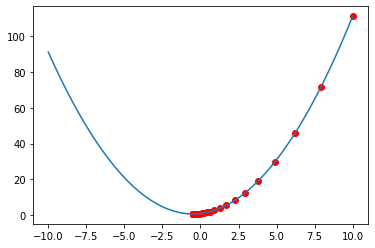

In [66]:
def gradient_decent(x0,eta ,epsilon,grad_update):
  X=[]
  X.append(x0)
  xt=x0
  x_next=grad_update(grad_f, xt,eta)
  while np.abs(xt-x_next)>epsilon: 
    xt=x_next
    X.append(xt)
    x_next=grad_update(grad_f, xt,eta)
  return X
X_list=gradient_decent(10,0.1,0.00001,grad_update)
Y_list=list(map(function, X_list))
plt.scatter(X_list,Y_list, c="r")
x = np.linspace(-10, 10, 100)
y = function(x)
plt.plot(x, y)
plt.show()


In [67]:















# 2.d
import numpy as np

def svm_with_sgd(X,y,lam=0,epochs=1000,l_rate=0.01,sgd_type="practical"):
  np.random.seed(2)
  if sgd_type == "practical":
    m=np.shape(X)[0]
    d=np.shape(X)[1]
    w=np.random.uniform(size=d)
    b=np.random.uniform(size=1)
    for epoch in range(epochs):
      permutation=np.arange(m)
      np.random.shuffle(permutation)
      for i in permutation:
        if 1-y[i]*(np.dot(w,X[i])+b)<=0:
          w_subG=2*lam*w
          b_subG=0
        else:
          w_subG=2*lam*w-np.dot(y[i],X[i])
          b_subG=-y[i]
        w=w-l_rate*w_subG
        b=b-l_rate*b_subG
    return w,b
  else:
    m=np.shape(X)[0]
    d=np.shape(X)[1]
    w=np.random.uniform(size=d)
    b=np.random.uniform(size=1)
    iterations=m*epochs
    w_sum=w
    b_sum=b
    for epoch in range(iterations):
      i=np.random.randint(m)
      x_i=X[i][0]
      y_i=y[i]
      if 1-y[i]*(np.dot(w,X[i])+b)<=0:
          w_subG=2*lam*w
          b_subG=0
      else:
        w_subG=2*lam*w-(y[i]*X[i])
        b_subG=-y[i]
      w=w-l_rate*w_subG
      b=b-l_rate*b_subG
      w_sum+=w
      b_sum+=b
    return w_sum/iterations,b_sum/iterations

In [68]:
# 2.e
def calculate_error(w, bias, X, y):
  m=np.shape(X)[0]
  error=0
  for i in range(m):
    if (np.dot(X[i],w)+bias)>=0:
        # print(np.dot(w,X[i])+bias)
        if y[i]==-1:
          error+=1
    else:
        if y[i]==1:
          error+=1
  return error/m

In [69]:
# 2.f
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X = X[y != 0]
y = y[y != 0]
y[y==2] = -1
X = X[:, 2:4]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
lambdas=[0,0.05,0.1,0.2,0.5]
train_errors=[]
test_errors=[]
margins=[]
for lam in lambdas:
  w,b= svm_with_sgd(X_train,y_train, lam)
  train_errors.append(calculate_error(w, b,X_train,y_train))
  test_errors.append(calculate_error(w, b,X_val,y_val))
  margins.append(1/np.linalg.norm(w))


<function matplotlib.pyplot.show(*args, **kw)>

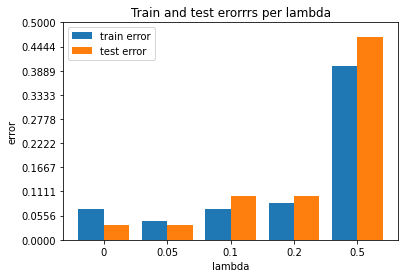

In [70]:
x_axis=np.arange(len(lambdas))
y_axis=np.linspace(0,0.5,10)
plt.bar(x_axis-0.2,train_errors, 0.4, label="train error")
plt.bar(x_axis+0.2,test_errors, 0.4, label= "test error")
plt.xticks(x_axis,lambdas)
plt.yticks(y_axis)
plt.xlabel("lambda")
plt.ylabel("error")
plt.title("Train and test erorrrs per lambda")
plt.legend()
plt.show

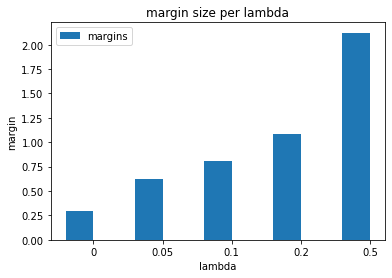

In [71]:
plt.bar(x_axis-0.2,margins, 0.4, label="margins")
plt.xlabel("lambda")
plt.ylabel("margin")
plt.title("margin size per lambda")
plt.xticks(x_axis,lambdas)
plt.legend()
plt.show()

<div dir="rtl">
המודל שנראה הטוב ביותר הוא המודל שהתקבל עבור למבדה שווה ל 0.05. ניתן לראות כי הוא ממזער את שגיאת האימון והולידציה ומקבל  margin שהוא בערך 0.6.

ניתן לראות כי ככל שלמבדה גדל ה mragin  גם כן זאת בעקבות כך ש למבדה הינו גורם רגולריזציה הגורם לטרייד אוף.

בפונקציית המטרה של בעיית הSVM ישנם 2 רכיבים לכן כאשר למבדה גדול משמותו היא שמתרכזים במיקסום הmargin ולכן נעדיף מישור מפריד עם שוליים רחבות יותר גם במחיר של הגדלת שגיאת האימון.
למבדה קטן משמעותו היא שמתרכזים במזעור טעויות בסיווג ולקבל הפרדה לינארית חזקה יותר, ולכן נעדיף למזער את שגיאת האימון גם במחיר של הקטנת רוחב השוליים.
</div>

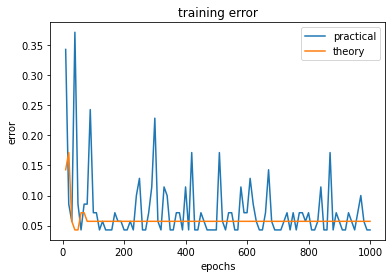

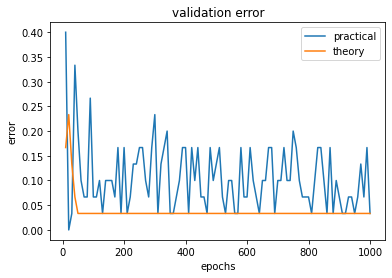

In [72]:
# 2.g
# lambda=0.05
import numpy as np
lam=0.05
train_errors_p=[]
train_errors_t=[]
test_errors_p=[]
test_errors_t=[]
epochs=np.linspace(10,1000,100)
for epoch in epochs:
  w,b= svm_with_sgd(X_train,y_train, lam,int(epoch),sgd_type="practical")
  train_errors_p.append(calculate_error(w, b,X_train,y_train))
  test_errors_p.append(calculate_error(w, b,X_val,y_val))
  w,b= svm_with_sgd(X_train,y_train, lam,int(epoch),sgd_type="theory")
  train_errors_t.append(calculate_error(w, b,X_train,y_train))
  test_errors_t.append(calculate_error(w, b,X_val,y_val))

# training
plt.plot(epochs,train_errors_p,label="practical") 
plt.plot(epochs,train_errors_t,label="theory")
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("training error")
plt.legend()
plt.show()


plt.plot(epochs,test_errors_p,label="practical") 
plt.plot(epochs,test_errors_t,label="theory")
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("validation error")
plt.legend()
plt.show()

<div dir="rtl">
קיבלנו כי האלגורתים התיאורטי מתכנס בצורה יציבה יותר . תוצאה זו הגיונית כיוון שלמדנו בהרצאה שאלגוריתם תיאורטי יוציב יותר ומתכנס הרבה יותר מהאלגוריתם הפרקטי, זאת עקב כך שאני מגרילים דוגמא ספציפית בכל איטרציה, ולא מחשבים לפי כל הדאטא (בניגוד לשיטה הפרקטית)
</div>

In [73]:
# 3.a


def error_calc(y_pred,y):
  error=0
  for i in range(len(y)):
    if y_pred[i]!=y[i]:
      error+=1
  return error/len(y)



def cross_validation_error(X,y,model ,folds):
  average_train_error=0
  average_val_error=0
  X_folds = np.array_split(X, folds)
  y_folds = np.array_split(y, folds)
  for i in range(folds):  
    # choosing the test fold
    X_fold_val=X_folds[i]
    y_fold_val=y_folds[i]
    X_fold_train=[]
    y_fold_train=[]
    for j in range(folds):
      if j!=i:
        for k in range(len(X_folds[j])):
            X_fold_train.append(X_folds[j][k])
            y_fold_train.append(y_folds[j][k])
    model.fit(X_fold_train,y_fold_train)
    y_train_pred=model.predict(X_fold_train)
    average_train_error+=error_calc(y_train_pred,y_fold_train)
    y_val_pred=model.predict(X_fold_val)
    average_val_error+=error_calc(y_val_pred,y_fold_val)

  return average_train_error/folds,average_val_error/folds



In [74]:
# 3.b
from sklearn.svm import SVC
def svm_results(X_train, y_train, X_test, y_test):
    
    lambdas = [10**-4, 10**-2, 1, 10**2, 10**4]
    folds=5
    error_dict={}
    for lam in lambdas:
      model = SVC(kernel='linear',C=1/lam)
      avarege_errors_train,average_error_val = cross_validation_error(X_train, y_train, model,folds) 
      model.fit(X_train,y_train)
      y_pred=model.predict(X_test)
      test_error=error_calc(y_pred,y_test)
      error_dict[f"SVM_lambda_{lam}"]=(avarege_errors_train,average_error_val,test_error)
    return error_dict
    

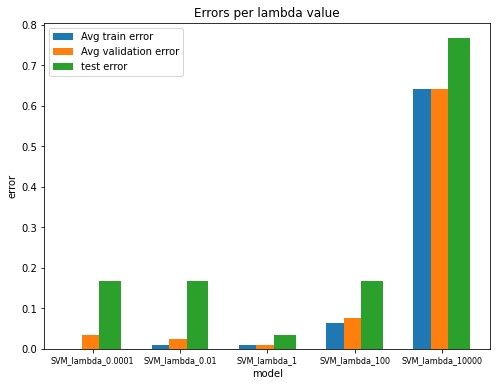

In [75]:
# 3.c
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

iris_data = load_iris()
X, y = iris_data['data'], iris_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
lambdas = [10**-4, 10**-2, 1, 10**2, 10**4]


error_dict = svm_results(X_train,y_train,X_test, y_test)
avg_train_error = []
avg_val_error = []
test_error = []
for value in error_dict.values():
    avg_train_error.append(value[0])
    avg_val_error.append(value[1])
    test_error.append(value[2])

x_axis=np.linspace(1,5,5)
plt.figure(figsize=(8,6))

plt.bar(x_axis - 0.2, avg_train_error,0.25, align='center', label='Avg train error')
plt.bar(x_axis, avg_val_error,0.25, align='center', label='Avg validation error')
plt.bar(x_axis + 0.2, test_error,0.25, align='center', label='test error')
plt.xlabel('model')
plt.ylabel('error')
plt.xticks(x_axis,list(error_dict.keys()), fontsize =8)
plt.title("Errors per lambda value")
plt.legend()
plt.show()




<div dir="rtl">
המודל הטוב ביותר לפי שיטת CV ולפי תחזית על מדגם המבחן היא SVM עם lambda שווה ל 1.

נשים לב כי לפי שיטת הCV עבור ערכי lambda קטנים המודל מבצע overfitting לk-1  הfolds שמשמשים כסט האימון. לכן השגיאה הממוצעת על סט האימון נמוכה, והשגאיה הממוצעת על סט הומבחן גדולה.

בנוסף, לפי שיטת הCV עבור אחרי lambda גדולים, המודל מבצעה הכללה. לכן השגיאה הממוצעת עלk-1 הfolds שמשמשים כסט אימון דומה לשגיאה הממוצעת על fold  המשמש כסט המבחן -אך שגיאה זו גדולה.

מכאן, שעבור פרמטר הרגולריזציה lambda שווה ל 1 , נקבל שיווי משקל בין  overfitting  להכללה ולכן הוא הטוב ביותר מבין ערכי lambda שבדקנו.

ניתן לראות שהערכתנו טובה ובהרצת המודל על סט המבחן עליו לא התאמנו -קיבלנו שאכן עבור פרמטר זה השגיאה מינמלית(מבין הערכים שבדקנו)
</div>